In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')
require('ggplot2')
require('dplyr')
require('readr')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse
In addition: Warning message:
package ‘lubridate’ was built under R version 4.3.3 


In [4]:
%%R

grad <- read.csv('grad.csv')
head(grad)

     dbn                         school_name Cohort.Year X..Grads
1 01M292          ORCHARD COLLEGIATE ACADEMY        2020     93.3
2 01M292          ORCHARD COLLEGIATE ACADEMY        2020     93.3
3 01M448 UNIVERSITY NEIGHBORHOOD HIGH SCHOOL        2020     96.8
4 01M448 UNIVERSITY NEIGHBORHOOD HIGH SCHOOL        2020     96.8
5 01M450          EAST SIDE COMMUNITY SCHOOL        2020     94.7
6 01M450          EAST SIDE COMMUNITY SCHOOL        2020     94.7


In [9]:
%%R

df <- df %>%
  left_join(grad, by = c("DBN" = "dbn"))
  head(df)

     DBN                    School.Name pct_female pct_male pct_asian pct_black
1 01M015      P.S. 015 Roberto Clemente       50.3     49.7      10.1      23.3
2 01M020           P.S. 020 Anna Silver       51.1     48.9      15.8      15.0
3 01M034 P.S. 034 Franklin D. Roosevelt       45.2     54.8       2.3      37.3
4 01M063      The STAR Academy - P.S.63       49.5     50.5       1.0      14.6
5 01M064          P.S. 064 Robert Simon       50.5     49.5       1.1      19.4
6 01M110  P.S. 110 Florence Nightingale       45.4     54.6      12.6      13.4
  pct_hispanic pct_multi.racial pct_native_american pct_white pct_disabilities
1         56.6              4.8                 0.5       4.8             23.3
2         58.2              2.9                 1.3       6.8             16.6
3         56.2              0.0                 0.9       3.2             26.3
4         68.9              2.4                 0.5      12.6             31.1
5         73.7              0.0              

In [12]:
%%R
df <- df %>%
  filter(!is.na(`X..Grads`))

In [17]:
%%R
df <- df %>%
  select(DBN, school_name.x,pct_temp_housing, X..Grads)

In [18]:
%%R
head(df)

     DBN                       school_name.x pct_temp_housing X..Grads
1 01M292          Orchard Collegiate Academy        15.658364     93.3
2 01M292          Orchard Collegiate Academy        15.658364     93.3
3 01M448 University Neighborhood High School         6.355932     96.8
4 01M448 University Neighborhood High School         6.355932     96.8
5 01M450          East Side Community School        12.215909     94.7
6 01M450          East Side Community School        12.215909     94.7


In [19]:
%%R

df <- df %>% distinct()


In [20]:
%%R
df <- df %>%
  rename(grad_rate = `X..Grads`)
  


In [24]:
%%R
df <- df %>%
  rename(school_name = `school_name.x`)

In [25]:
%%R
head(df)

     DBN                             school_name pct_temp_housing grad_rate
1 01M292              Orchard Collegiate Academy        15.658364      93.3
2 01M448     University Neighborhood High School         6.355932      96.8
3 01M450              East Side Community School        12.215909      94.7
4 01M458               Forsyth Satellite Academy        18.396227      32.0
5 01M458               Forsyth Satellite Academy        18.396227      30.0
6 01M515 Lower East Side Preparatory High School        21.317157      46.7


In [27]:
%%R

model <- lm(grad_rate~pct_temp_housing, data=df)
summary(model)


Call:
lm(formula = grad_rate ~ pct_temp_housing, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-71.222  -2.811   5.744  11.163  47.265 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      88.16496    1.14442  77.039  < 2e-16 ***
pct_temp_housing -0.49747    0.06167  -8.066  2.6e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.63 on 813 degrees of freedom
Multiple R-squared:  0.0741,	Adjusted R-squared:  0.07296 
F-statistic: 65.06 on 1 and 813 DF,  p-value: 2.596e-15



`geom_smooth()` using formula = 'y ~ x'


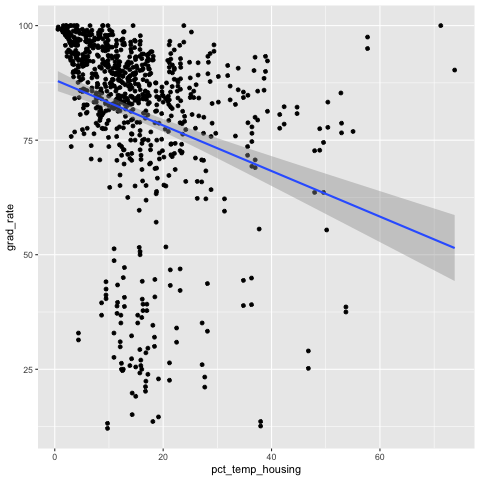

In [29]:
%%R 

ggplot(df) + 
	aes(x=pct_temp_housing, y=grad_rate) + 
	geom_point() +
	geom_smooth(method='lm')

In [30]:
%%R

new_df <- df %>%
  mutate(
    predicted = predict(model),
    residuals = resid(model),
    residual_z = scale(residuals)
  ) %>%
  select(school_name, grad_rate, predicted, residuals, residual_z) %>%
  arrange(residual_z)


In [31]:
%%R 

new_df %>% tail(10)

                                           school_name grad_rate predicted
806                International Community High School      77.8  15.65756
807                International Community High School      83.3  14.83833
808             High School for Law and Public Service      76.6  15.83629
809             High School for Law and Public Service      78.7  15.52350
810          International High School at Union Square      85.3  14.54044
811 Urban Assembly School of Business for Young Women,      76.9  15.79161
812                Academy for Language and Technology      95.0  13.09563
813                Academy for Language and Technology      97.5  12.72326
814             Pan American International High School     100.0  12.35088
815              Manhattan Academy For Arts & Language      90.3  13.79569
    residuals residual_z
806  34.72412   3.408273
807  35.54334   3.488682
808  37.07552   3.639069
809  37.38831   3.669770
810  38.25144   3.754489
811  39.24715   3.852221
